# Complaints Exploratory Data Analysis 
This notebook contains EDA on civilian complaints filed against New York City police officers from from 1985 to 2020, obtained from [Propublica](www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers)


---
## IMPORTS
---

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt



---
## Exploratory Data Analysis
---

In [3]:
complaints = pd.read_csv("/content/cleaned_complaints_data.csv")

In [4]:
complaints.head()

,Unnamed: 0,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [5]:
#total number of rows and columns in the dataset
complaints.shape

(33358, 28)

In [6]:
#complaints = complaints[complaints['complainant_age_incident'] > 0 ]
#complaints = complaints[complaints['precinct'] < 200 ]

In [6]:
print(complaints['year_received'].nunique())
print(complaints['year_received'].min())
print(complaints['year_received'].max())

36
1985
2020


The dataset contains 33,358 rows of data spanning 36 years from 1985 to 2020

In [7]:
complaints['complainant_gender'].value_counts(normalize = True)

Male                     0.824949
Female                   0.172170
Not described            0.001955
Transwoman (MTF)         0.000686
Transman (FTM)           0.000171
Gender non-conforming    0.000069
Name: complainant_gender, dtype: float64

In [8]:
proportion = complaints['complainant_ethnicity']
proportion.value_counts(normalize= True)

Black              0.592303
Hispanic           0.222330
White              0.096318
Unknown            0.036028
Other Race         0.023430
Asian              0.018412
Refused            0.008964
American Indian    0.002215
Name: complainant_ethnicity, dtype: float64

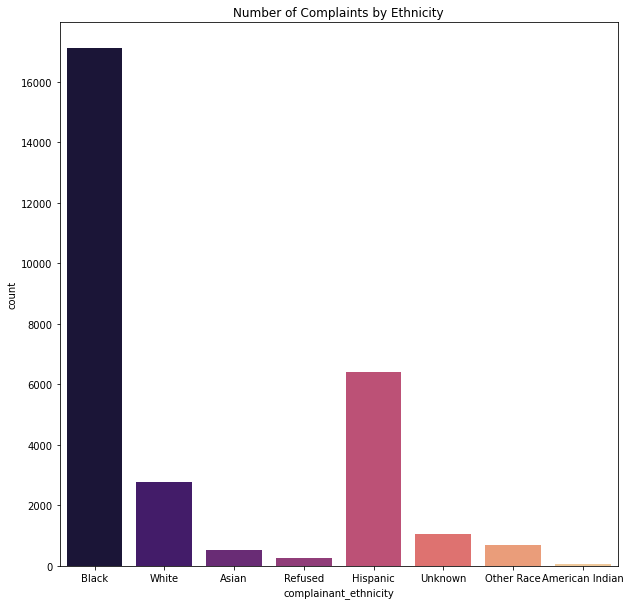

In [9]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'complainant_ethnicity', data = complaints, palette = 'magma')
plt.title("Number of Complaints by Ethnicity")
plt.show()

Nearly 60% of civilian complaints against NYPD officers were filed by Black People , 22% by Hispanic People and 10% from White people.

In [11]:
ethnicity_by_age.median()

complainant_ethnicity
American Indian    31.0
Asian              31.0
Black              30.0
Hispanic           30.0
Other Race         32.0
Refused            33.0
Unknown            28.0
White              33.0
Name: complainant_age_incident, dtype: float64

Median age of complainants were slightly younger for Black and Hispanic groups than for White, Asian and American Indian people.

In [12]:
#Total number of complaints by precinct 
complaints['precinct'].value_counts()

75.0      2172
73.0      1163
44.0      1139
46.0      1120
67.0      1119
          ... 
17.0        76
111.0       37
0.0         21
22.0        12
1000.0       3
Name: precinct, Length: 79, dtype: int64


The range in the number of complaints filed against any single precinct is from 400 - 2172

In [13]:
#Different type of complaint catagories
complaints['fado_type'].value_counts()

Abuse of Authority    20292
Force                  7636
Discourtesy            4677
Offensive Language      753
Name: fado_type, dtype: int64

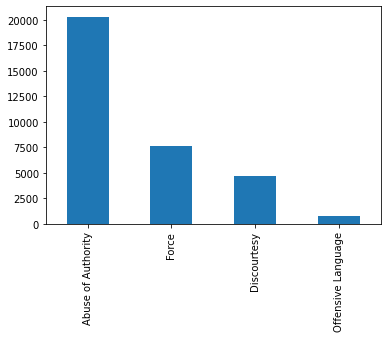

In [14]:
complaints['fado_type'].value_counts().plot(kind = 'bar');

There are four different types of complaint. "Abuse of Authority" is by far the most reported complaint against police and has more than double the amount of any other group. The other groups are "Force", "Discourtesy" and "Offensive Language". 

In [15]:
#Complaint type by precinct 
type_complaint = complaints.groupby("precinct")["fado_type"]

#Proportion of each type of complaint for each of the three precints with the highest number of complaints
print(type_complaint.get_group(75.0).value_counts(normalize = True))

print(type_complaint.get_group(73.0).value_counts(normalize = True))

print(type_complaint.get_group(44.0).value_counts(normalize = True))

Abuse of Authority    0.627072
Force                 0.219613
Discourtesy           0.127993
Offensive Language    0.025322
Name: fado_type, dtype: float64
Abuse of Authority    0.685297
Force                 0.207223
Discourtesy           0.095443
Offensive Language    0.012038
Name: fado_type, dtype: float64
Abuse of Authority    0.581212
Force                 0.237928
Discourtesy           0.155399
Offensive Language    0.025461
Name: fado_type, dtype: float64


The proportion of the type of complaint for each of the three pecincts with the highest number of complaints all follow the same pattern. Abuse of authority is reported the most, followed by Force, then Discourtesy and finally Offensive Language

In [16]:
# Count and type of complaint by ethnicity 
complaints_by_race = complaints.groupby('complainant_ethnicity')['allegation']

black_complaints = complaints_by_race.get_group('Black')
white_complaints = complaints_by_race.get_group('White')
hispanic_complaints = complaints_by_race.get_group('Hispanic')
unknownrace_complaints= complaints_by_race.get_group('Unknown')
otherrace_complaints = complaints_by_race.get_group('Other Race')
asian_complaints = complaints_by_race.get_group('Asian')
refusedrace_complaints =complaints_by_race.get_group('Refused')
american_indian_complaints = complaints_by_race.get_group('American Indian')

In [17]:
#Top complaints filed by black people
black_complaints.value_counts(ascending = False).head(10)

Physical force                           2815
Word                                     2071
Stop                                     1450
Search (of person)                       1185
Frisk                                    1145
Refusal to provide name/shield number     878
Vehicle search                            864
Vehicle stop                              684
Threat of arrest                          636
Threat of force (verbal or physical)      521
Name: allegation, dtype: int64

In [ ]:
#Top complaints filed by white people
white_complaints.value_counts(ascending = False).head(10)

Word                                     439
Physical force                           416
Threat of arrest                         204
Refusal to provide name/shield number    180
Search (of person)                       178
Stop                                     166
Vehicle search                           144
Frisk                                    124
Vehicle stop                             102
Threat of force (verbal or physical)      90
Name: allegation, dtype: int64

In [12]:
hispanic_complaints.value_counts(ascending = False).head(10)

Physical force                           1121
Word                                      936
Stop                                      454
Search (of person)                        443
Frisk                                     400
Threat of arrest                          308
Refusal to provide name/shield number     293
Vehicle search                            290
Vehicle stop                              217
Threat of force (verbal or physical)      195
Name: allegation, dtype: int64

In [13]:
asian_complaints.value_counts(ascending= False).head(10)

Word                                     73
Physical force                           69
Threat of arrest                         61
Vehicle stop                             29
Vehicle search                           29
Search (of person)                       28
Frisk                                    26
Stop                                     24
Refusal to provide name/shield number    18
Threat of force (verbal or physical)     16
Name: allegation, dtype: int64

In [14]:
american_indian_complaints.value_counts(ascending = False).head(10)

Search (of person)                      9
Frisk                                   9
Vehicle search                          7
Stop                                    7
Word                                    7
Physical force                          4
Threat of force (verbal or physical)    3
Gun Pointed                             2
Question                                2
Threat of arrest                        2
Name: allegation, dtype: int64

The top allegations against NYPD police officers are of a physical nature for Black People and Hispanic People, but of a verbal nature for white people and Asian people. Allegations made by American Indians mostly pertained to being searched.


In [18]:
#Catagory of complaint by ethnicity
type_per_ethnicity = complaints.groupby('fado_type')['complainant_ethnicity']

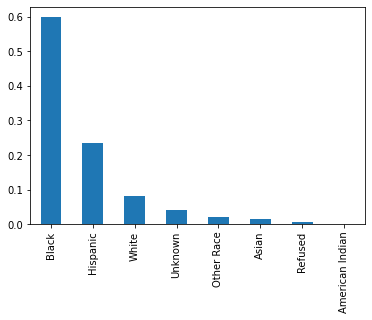

In [19]:
#Proportion of "Force" Complaints by ethnicity
type_per_ethnicity.get_group('Force').value_counts(normalize = True).plot(kind = 'bar');

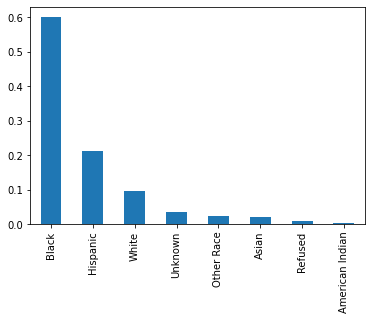

In [20]:
#Proportion of "Abuse of Authority" Complaints by ethnicity
type_per_ethnicity.get_group('Abuse of Authority').value_counts(normalize = True).plot(kind = 'bar');

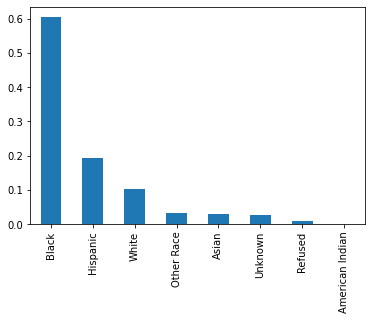

In [21]:
#Proportion of "Offensive Language" Complaints by ethnicity
type_per_ethnicity.get_group('Offensive Language').value_counts(normalize = True).plot(kind = 'bar');

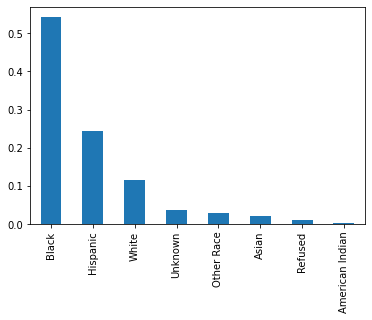

In [16]:
#Proportion of "Discourtesy" Complaints by ethnicity
type_per_ethnicity.get_group('Discourtesy').value_counts(normalize = True).plot(kind = 'bar');


These charts show the proportion of each race who filed each type of complaint. Every chart shows the same trend, over 50% Black then hispanic then white.

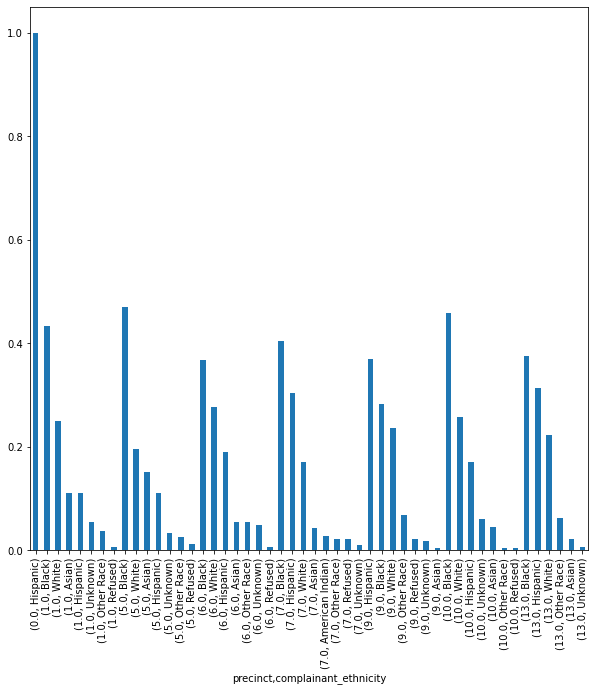

In [25]:
#Proportion of complaints by ethnicity per precinct
race_by_precinct = complaints.groupby("precinct")["complainant_ethnicity"].value_counts(normalize = True)
race_by_precinct.head(50).plot(kind = 'bar', figsize = (10,10));

In [27]:
#Outcome of complaint by ethnicity of complainant
outcomes= complaints.groupby('complainant_ethnicity')['outcome_description']

In [28]:
#Outcomes by percentage for black people
outcomes.get_group('Black').value_counts()

No arrest made or summons issued        6145
Arrest - other violation/crime          5390
Summons - disorderly conduct            1233
Summons - other violation/crime         1033
Arrest - resisting arrest                888
Arrest - disorderly conduct              595
Arrest - assault (against a PO)          546
Arrest - OGA                             421
Moving violation summons issued          389
Other VTL violation summons issued       269
Parking summons issued                   148
Juvenile Report                           35
Arrest - harrassment (against a PO)        8
Summons - harrassment (against a PO)       1
Summons - OGA                              1
Name: outcome_description, dtype: int64

In [29]:
# Outcomes by percentage for white people
outcomes.get_group('White').value_counts()

No arrest made or summons issued       1177
Arrest - other violation/crime          670
Summons - other violation/crime         232
Summons - disorderly conduct            164
Moving violation summons issued         162
Arrest - resisting arrest               111
Arrest - assault (against a PO)          75
Arrest - disorderly conduct              70
Other VTL violation summons issued       48
Arrest - OGA                             38
Parking summons issued                   26
Arrest - harrassment (against a PO)       1
Name: outcome_description, dtype: int64

In [30]:
# Outcomes by percentage for Hispanic people
outcomes.get_group('Hispanic').value_counts()

No arrest made or summons issued        2189
Arrest - other violation/crime          2139
Summons - disorderly conduct             479
Arrest - resisting arrest                373
Summons - other violation/crime          373
Arrest - disorderly conduct              249
Other VTL violation summons issued       155
Moving violation summons issued          150
Arrest - assault (against a PO)          139
Arrest - OGA                             100
Parking summons issued                    58
Juvenile Report                            6
Summons - harrassment (against a PO)       4
Name: outcome_description, dtype: int64

In [31]:
# Outcomes by percentage for Asian people
outcomes.get_group('Asian').value_counts()

No arrest made or summons issued      218
Arrest - other violation/crime        121
Moving violation summons issued        54
Summons - other violation/crime        38
Summons - disorderly conduct           29
Arrest - resisting arrest              25
Arrest - OGA                           12
Parking summons issued                 11
Arrest - assault (against a PO)         8
Arrest - disorderly conduct             7
Other VTL violation summons issued      7
Name: outcome_description, dtype: int64

In [32]:
# Outcomes by percentage for American Indian people
outcomes.get_group('American Indian').value_counts()*100

No arrest made or summons issued      3400
Summons - disorderly conduct          1000
Arrest - other violation/crime         800
Other VTL violation summons issued     700
Summons - other violation/crime        300
Moving violation summons issued        200
Name: outcome_description, dtype: int64

For each ethnicity the outcome of the complaint most often did not result in arrest. The complaints that did result in arrest broke down as follows: 46.7% of Hispanics who complained were arrested, 45.8% of Black People who complained were arrested, 34.7% of White people who complained were arrested, 12.5% of Asian people who complained were arrested and 12.5% of American Indian people who complained were arrested. 